# 4- Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor  
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:
data = pd.read_excel("adverts1-2.xlsx")
data

,Unnamed: 0,city,district,neighborhood,room,m²,price
0,0,Adana,Ceyhan,Cumhuriyet,2+1,130,7000
1,1,Adana,Ceyhan,Cumhuriyet,4+1,180,12000
2,2,Adana,Ceyhan,Cumhuriyet,2+1,115,7250
3,3,Adana,Ceyhan,Hürriyet,3+1,185,11500
4,4,Adana,Ceyhan,Ulus,3+1,165,9000
...,...,...,...,...,...,...,...
27113,27113,Yozgat,Yerköy,100. Yıl,3+1,135,4250
27114,27114,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
27115,27115,Yozgat,Yerköy,100. Yıl,3+1,140,3250
27116,27116,Zonguldak,Çaycuma,Karamusa,3+1,120,11000


In [4]:
data = data.drop("Unnamed: 0", axis=1)

In [5]:
df = data

In [6]:
# Assing dummy variable to columns for each room type
df = pd.get_dummies(df, columns=["room"], prefix=["room"])

In [7]:
# learn how many advert for each room type using cplumns that assing dummy 
arr= [df["room_1+0"].sum(), df["room_1+1"].sum(), df["room_2+1"].sum(), df["room_3+1"].sum(), df["room_4+1"].sum()]
arr

[510, 5225, 9778, 10236, 1369]

In [8]:
# Apply LabelEencoder transformation for 'city', 'district', 'neighborhood'
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the string column 'city'
df['city_le'] = le.fit_transform(df['city'])

# Encode the string column 'district'
df['district_le'] = le.fit_transform(df['district'])

# Encode the string column 'neighborhood'
df['neighborhood_le'] = le.fit_transform(df['neighborhood'])

In [9]:
df = df.drop(["city","district","neighborhood"], axis=1)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m²,27118.0,112.314514,39.752902,20.0,85.0,110.0,140.0,230.0
price,27118.0,14284.049856,6637.580786,2000.0,10000.0,13000.0,17000.0,57500.0
room_1+0,27118.0,0.018807,0.135844,0.0,0.0,0.0,0.0,1.0
room_1+1,27118.0,0.192676,0.394408,0.0,0.0,0.0,0.0,1.0
room_2+1,27118.0,0.360572,0.480175,0.0,0.0,0.0,1.0,1.0
room_3+1,27118.0,0.377461,0.484761,0.0,0.0,0.0,1.0,1.0
room_4+1,27118.0,0.050483,0.218944,0.0,0.0,0.0,0.0,1.0
city_le,27118.0,41.867763,27.576993,0.0,8.0,48.0,71.0,73.0
district_le,27118.0,195.596357,109.571811,0.0,106.0,199.0,283.0,383.0
neighborhood_le,27118.0,1232.499004,742.287054,0.0,540.0,1240.5,1912.0,2471.0


In [11]:
df.head()

,m²,price,room_1+0,room_1+1,room_2+1,room_3+1,room_4+1,city_le,district_le,neighborhood_le
0,130,7000,0,0,1,0,0,0,88,500
1,180,12000,0,0,0,0,1,0,88,500
2,115,7250,0,0,1,0,0,0,88,500
3,185,11500,0,0,0,1,0,0,88,1013
4,165,9000,0,0,0,1,0,0,88,1973


In [12]:
# Define dependet and independet variables

y = df["price"]
x = df.drop("price", axis=1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
# for learning rate"test_data/all_data" that 2+1 room type  
(x_test["room_2+1"].sum()) / (x_test["room_2+1"].sum() + x_train["room_2+1"].sum())

0.20085907138474127

In [15]:
x_train

,m²,room_1+0,room_1+1,room_2+1,room_3+1,room_4+1,city_le,district_le,neighborhood_le
1287,145,0,0,0,1,0,5,21,733
18226,115,0,0,0,1,0,72,76,705
13766,130,0,0,1,0,0,71,124,1643
23406,70,0,0,1,0,0,49,74,1236
5099,80,0,0,1,0,0,6,191,2132
...,...,...,...,...,...,...,...,...,...
21575,200,0,0,0,0,1,45,335,1871
5390,80,0,0,1,0,0,6,199,1008
860,60,0,1,0,0,0,0,287,1830
15795,74,0,1,0,0,0,71,210,234


#### Creating machine learning models

In [16]:
# KNN regression
knn_model = KNeighborsRegressor().fit(x_train, y_train)

In [17]:
y_pred_knn = knn_model.predict(x_test)

In [18]:
mse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mse_knn

5145.270325654042

In [34]:
# Decision Tree regression
dec_tree = DecisionTreeRegressor().fit(x_train, y_train)

In [35]:
y_pred_tree = dec_tree.predict(x_test)

In [36]:
mse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mse_tree

5453.936159682585

In [37]:
# Random Forest regression
rf = RandomForestRegressor().fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

mse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mse_rf

4457.751142209001

In [ ]:
# Cat Boost regression
cat_boost = CatBoostRegressor().fit(x_train, y_train)

y_pred_cat = cat_boost.predict(x_test)

mse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))

In [39]:
mse_cat

4392.805183995254

In [52]:
# Bagged Trees regression
bag_model = BaggingRegressor(bootstrap_features = True).fit(x_train, y_train)

y_pred_bag = bag_model.predict(x_test)

mse_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))
mse_bag

4348.894303377174

In [ ]:
!pip install lightgbm

In [43]:
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [ ]:
lgbm_model = LGBMRegressor().fit(x_train, y_train)

y_pred_lgbm = lgbm_model.predict(x_test)

mse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

In [45]:
mse_lgbm

4508.189849935392

In [46]:
# Gradient Boosting regression
gbm_model = GradientBoostingRegressor().fit(x_train, y_train)

y_pred_gbm = gbm_model.predict(x_test)

mse_gbm = np.sqrt(mean_squared_error(y_test, y_pred_gbm))
mse_gbm

5026.818159551314

In [ ]:
!pip install xgboost

In [50]:
# XGBoost regression
xgb_model = XGBRegressor().fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

mse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mse_xgb

4346.723388373664

<BarContainer object of 8 artists>

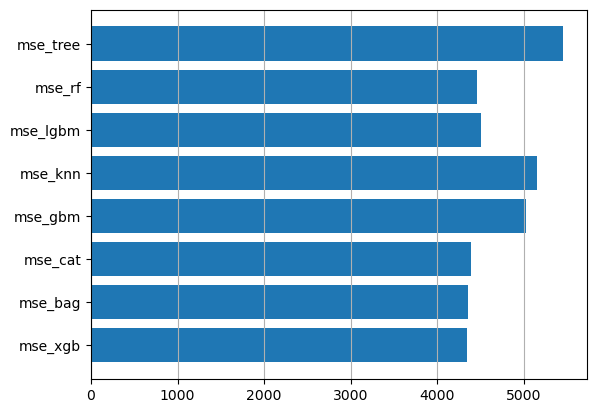

In [53]:
# mse comparison of all models

all_mse = pd.DataFrame({
    "x": ["mse_xgb","mse_bag","mse_cat","mse_gbm","mse_knn","mse_lgbm","mse_rf","mse_tree"],
    "y": [mse_xgb,mse_bag,mse_cat,mse_gbm,mse_knn,mse_lgbm,mse_rf,mse_tree]  
})

plt.grid(axis="x")
plt.barh(all_mse["x"], all_mse["y"])

In [ ]:
# XGB showed the best performance in this dataset

#### XGB model tuning

In [67]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(x_train, y_train)

In [69]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 1000}

In [54]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.6, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(x_train,y_train)

In [55]:
y_pred = xgb_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4240.442662558513

### Show estimated price and many useful output using XGB model based on entered infos 

In [84]:
def pred_price(city, district, neighborhood, room, metrekare):
  
    d = data
    if city!="" and city not in d["city"].tolist():
        print("--------------------------------\n\nBöyle bir il bulunamadı ya da bu ilde ilan yok!\n")
        print("Şehir ismini doğru yazdığınızdan emin olun!\nŞehrin baş harfini büyük yazmayı deneyin!\n")
        return None    
    if district!="" and district not in d["district"].tolist():
        print("--------------------------------\n\nBöyle bir ilçe bulunamadı ya da bu ilçede ilan yok!\n")
        print("İlçe ismini doğru yazdığınızdan emin olun!\nİlçenin baş harfini büyük yazmayı deneyin!\n")
        return None
    if neighborhood!="" and neighborhood not in d["neighborhood"].tolist():
        print("--------------------------------\n\nBöyle bir mahalle bulunamadı ya da bu mahallede ilan yok!\n")
        print("Mahalle ismini doğru yazdığınızdan emin olun!\nMahallenin baş harfini büyük yazmayı deneyin!\n")
        return None

    
    if metrekare=="" and room=="1+0": 
        metrekare=40
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="1+1": 
        metrekare=65
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="2+1": 
        metrekare=100
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="3+1": 
        metrekare=130
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="4+1": 
        metrekare=160
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="": 
        metrekare=110
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    else: 
        pass

    
    
    new = pd.DataFrame({"city":[city], "district":[district], "neighborhood":[neighborhood], "room":[room], "m²":[metrekare]})
    new["m²"] = pd.to_numeric(new["m²"])
       
    dff = d.drop("price", axis=1)
    dff = pd.concat([dff, new], axis=0)

    dff[""] = np.arange(len(dff))
    dff = dff.set_index("")

    # Get dummies the string column"room"
    dff = pd.get_dummies(dff, columns=["room"], prefix=["room"])

    # Encode the string column'city'
    dff['city_le'] = le.fit_transform(dff['city'])
    
    # Encode the string column'district'
    dff['district_le'] = le.fit_transform(dff['district'])
    
    # Encode the string column'neighborhood'
    dff['neighborhood_le'] = le.fit_transform(dff['neighborhood'])

    dff =dff.drop(["city","district","neighborhood"], axis=1)
   
    if room=="":
        dff = dff.drop("room_", axis=1)
    
    # len(data) = 27118 = index of last row
    train_data = dff.iloc[27118:,:]
    pred = xgb_tuned.predict(train_data)
    #print(f"----------------------------\n\nGirilen bilgilere göre tahmini fiyat: {int(pred)} TL\n\n----------------------------")



    # write advertising infos according to inputs entered by user
    if city=="" and room!="":
        a=d[d["room"]==room]
        print(f"----------------------------\n\nTürkiye'de tahmini {room} kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        
        print(f"\nTürkiye'de toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
    
    elif district=="" and room!="":
        a=d[d["city"]==city]
        a=a[a["room"]==room]
        print(f"----------------------------\n\n{city} şehrinde tahmini {room} kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{city} ilinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
   
    elif neighborhood=="" and room!="":
        a=d[d["district"]==district]
        a=a[a["room"]==room]
        print(f"----------------------------\n\n{district} ilçesinde tahmini {room} kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{district} ilçesinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
   
    elif neighborhood != "" and room!="":
        a=d[d["district"]==district]
        a=a[a["neighborhood"]==neighborhood]
        a=a[a["room"]==room]
        print(f"----------------------------\n\n{neighborhood} mahallesinde tahmini {room} kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{neighborhood} mahallesinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")

    
    elif room=="" and city=="":
        print(f"----------------------------\n\nTürkiye'de tahmini kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        print(f"Türkiye'de toplam {len(d)} tane ilan var.\n\n----------------------------")
    
    elif room == "" and district=="":
        a=d[d["city"]==city]
        print(f"----------------------------\n\n{city} şehrinde tahmini kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{city} ilinde toplam {len(a)} tane ilan var.\n\n----------------------------")
    
    elif room == "" and neighborhood=="":
        a=d[d["district"]==district]
        print(f"----------------------------\n\n{district} ilçesinde tahmini kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{district} ilçesinde toplam {len(a)} tane ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
    
    elif room == "" and neighborhood!="":
        a=d[d["city"]==city]
        a=a[a["neighborhood"]==neighborhood]
        print(f"----------------------------\n\n{neighborhood} mahallesinde tahmini kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{neighborhood} mahallesinde toplam {len(a)} tane ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
    
    else:
        pass



In [86]:
# Get the desired advertisement informations

print("İstenilen şekilde filtreleme yapılabilir.\n")

city = ""
city = input("City: ")
district = ""
district = input("District: ")
neighborhood = ""
neighborhood = input("Neighborhood: ")
room = ""
room = input("Rooms: ")
metrekare = ""
metrekare = input("Meter: ")

# Sent inputs to pred_price function
pred_price(city,district,neighborhood,room,metrekare)



İstenilen şekilde filtreleme yapılabilir.



City:  İstanbul
District:  Bağcılar
Neighborhood:  
Rooms:  3+1
Meter:  


----------------------------

Bağcılar ilçesinde tahmini 3+1 kira fiyatı: 15822 TL

----------------------------

Ortalama metrekare fiyatı 113TL - 142TL aralığında.

En düşük fiyat: 10000 
En yüksek fiyat: 35000

Bağcılar ilçesinde toplam 40 tane 3+1 ilan var.

----------------------------

Girilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':

    city district neighborhood room  m²  price
İstanbul Bağcılar        Fatih  3+1 130  10000
İstanbul Bağcılar   Yıldıztepe  3+1 140  10500
İstanbul Bağcılar Fevzi Çakmak  3+1 110  11000
İstanbul Bağcılar Fevzi Çakmak  3+1 115  11000
İstanbul Bağcılar  Yenimahalle  3+1 110  11000
İstanbul Bağcılar    Demirkapı  3+1 125  12000
İstanbul Bağcılar  Yavuz Selim  3+1 120  12000
İstanbul Bağcılar    15 Temmuz  3+1 115  12500
İstanbul Bağcılar       Merkez  3+1 140  13000
İstanbul Bağcılar       Merkez  3+1 120  13000
İstanbul Bağcılar       Merkez  3+1 140  13000
İstanbul Bağcılar       Merkez  3+1 140  13000
İstanbul Bağcıl